In [6]:
from modules.hand_visualizations import *

Exploring RPS dataset...
Dataset path: /Users/christina/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2
Dataset exists: True
Total images found: 4376

Class distribution:
paper: 1424 images
rock: 1452 images
scissors: 1500 images

Sample image paths:
paper: /Users/christina/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2/paper/W79peyAyfQqNP1vF.png
rock: /Users/christina/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2/rock/foxUXc8WPRDAd6LM.png
scissors: /Users/christina/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2/rps-cv-images/scissors/6TMYdUMhaEWHQOcc.png

Found 4376 images total

Visualizing sample images from each class...


I0000 00:00:1751397643.217604  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1751397643.233338  178306 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751397643.237831  178314 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


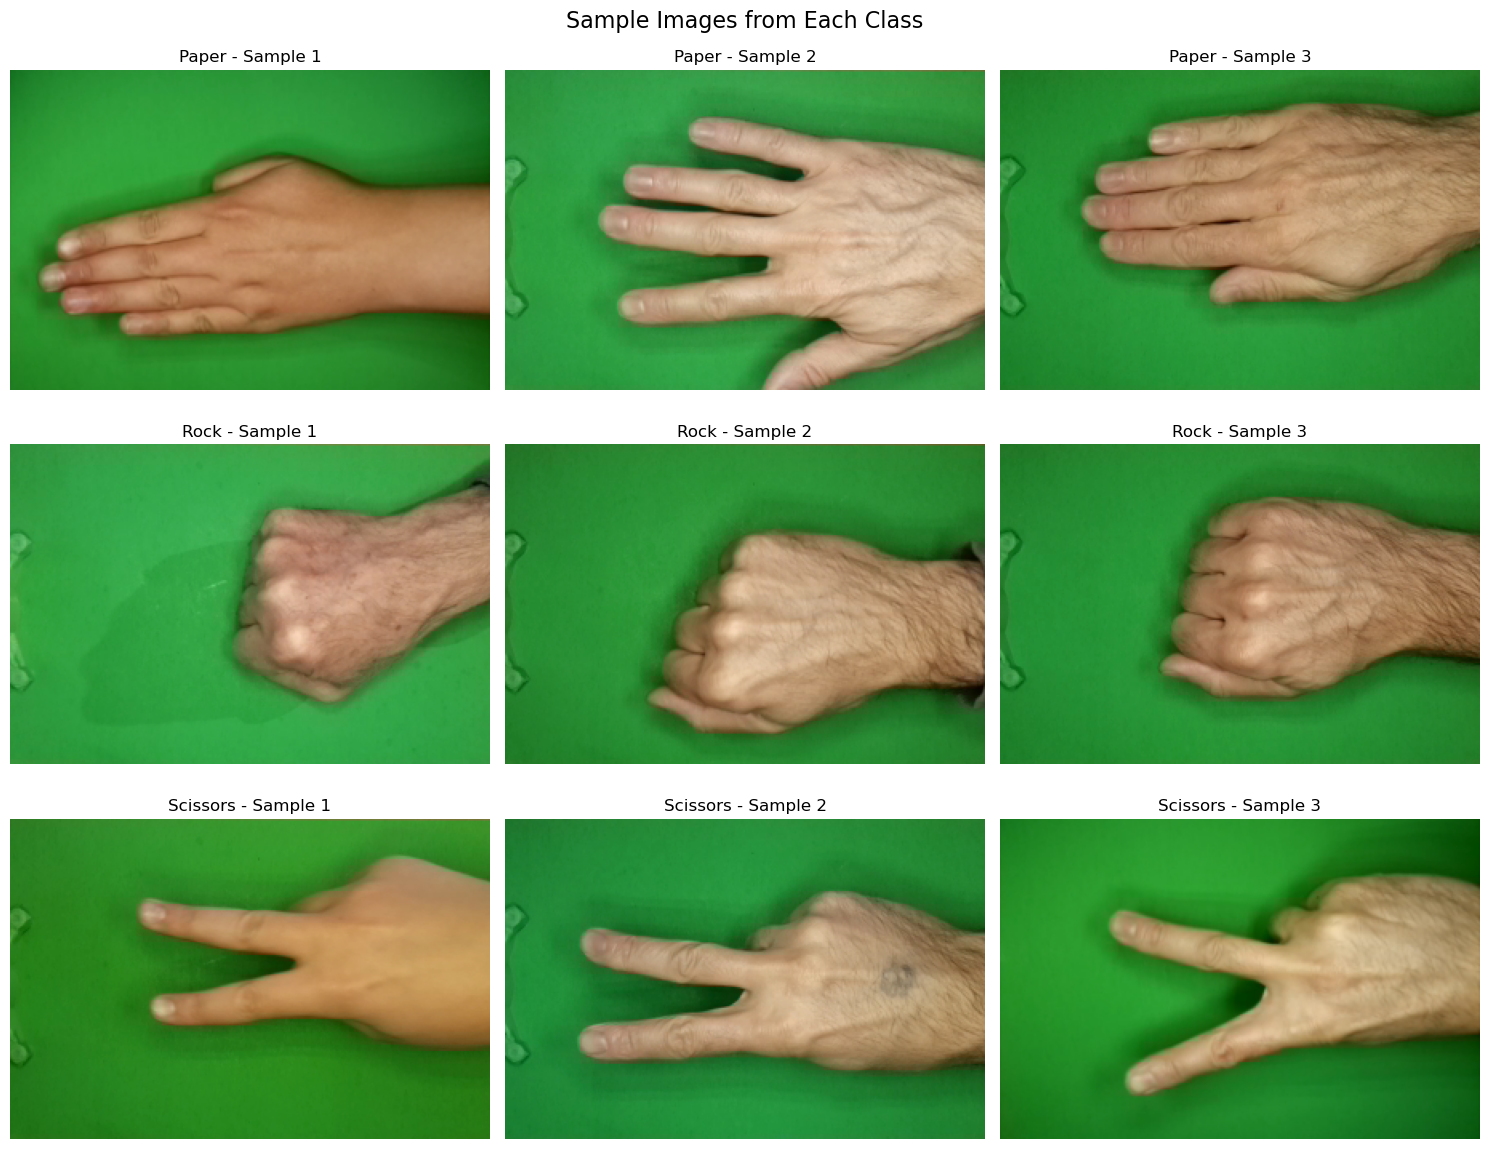


Processing hand representations...

Processing paper example...


I0000 00:00:1751397644.007147  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
W0000 00:00:1751397644.012375  178336 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751397644.017883  178340 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751397644.125062  178344 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


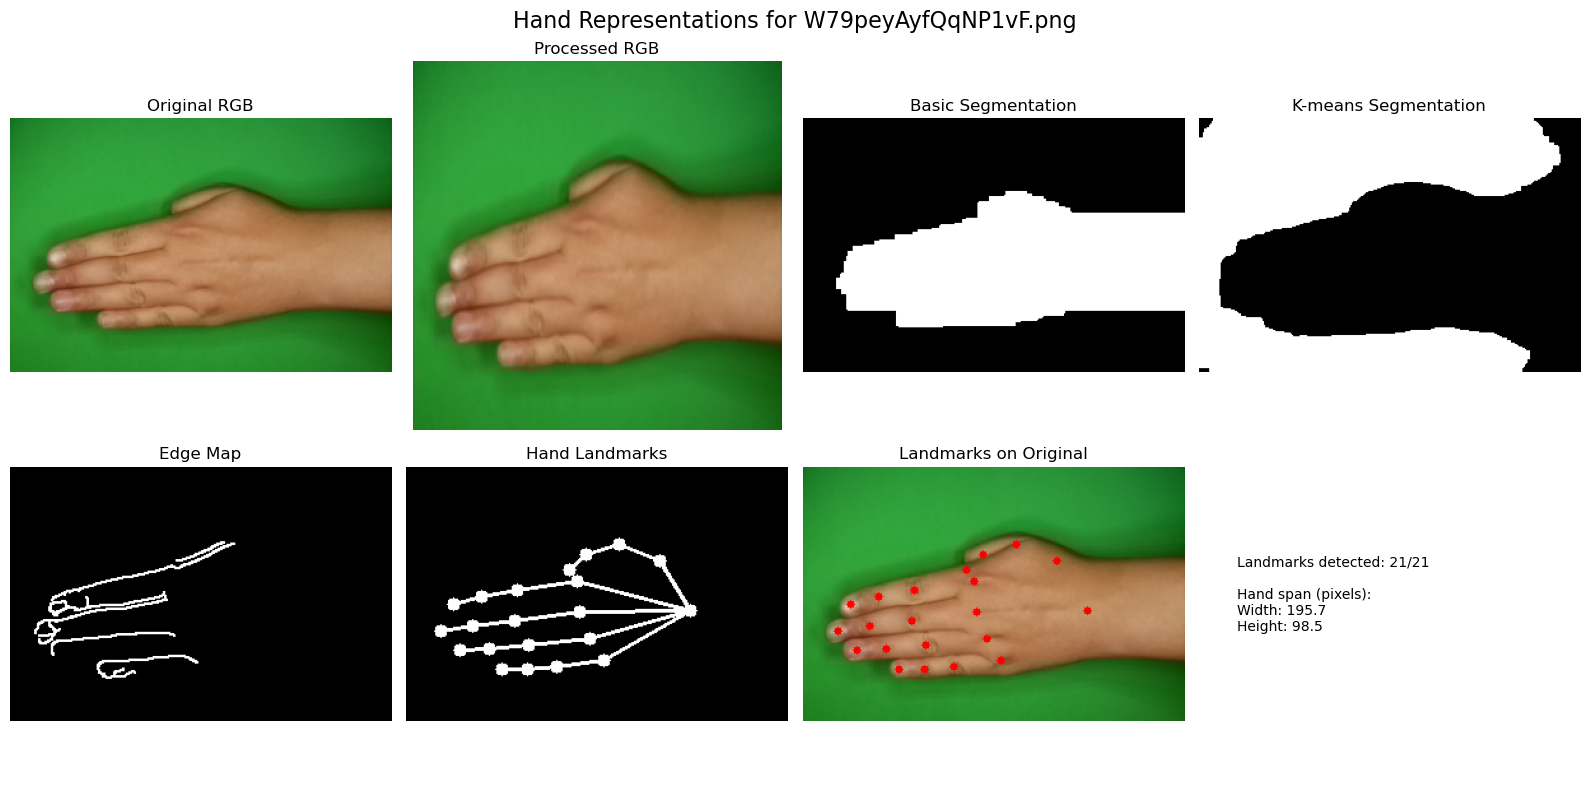

Representation shapes for paper:
  raw_rgb: (224, 224, 3)
  seg_mask: (200, 300)
  seg_mask_improved: (200, 300)
  edges: (200, 300)
  landmarks: (21, 2)
  landmark_image: (200, 300, 3)

Label mapping: {'paper': 0, 'scissors': 1, 'rock': 2}

Creating PyTorch datasets...
Train set: 3500 images
Test set: 876 images

Datasets created successfully!
Available representations: ['raw_rgb', 'seg_mask', 'edges', 'landmarks']

Testing data loading...
raw_rgb: data shape = torch.Size([3, 224, 224]), label = 2
seg_mask: data shape = torch.Size([3, 200, 300]), label = 2


I0000 00:00:1751397644.409013  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
I0000 00:00:1751397644.414040  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
W0000 00:00:1751397644.414291  178363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1751397644.418747  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pro
W0000 00:00:1751397644.420853  178363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751397644.421575  178373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1751397644.424084  176293 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Pr

edges: data shape = torch.Size([3, 200, 300]), label = 2
landmarks: data shape = (42,), label = 2


In [ ]:
# Example: How to use different representations in training
if __name__ == "__main__":
    # Your dataset path
    dataset_path = "/Users/christina/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2"
    
    print("Exploring RPS dataset...")
    image_paths, labels, class_images = explore_rps_dataset(dataset_path)
    
    if image_paths:
        print(f"\nFound {len(image_paths)} images total")
        
        # Visualize samples from each class
        print("\nVisualizing sample images from each class...")
        visualize_multiple_samples(class_images, num_samples=3)
        
        # Process and visualize representations for one sample from each class
        print("\nProcessing hand representations...")
        for class_name, images in class_images.items():
            if images:
                print(f"\nProcessing {class_name} example...")
                sample_image = images[0]  # Take first image from each class
                representations = visualize_representations(sample_image)
                
                print(f"Representation shapes for {class_name}:")
                for key, value in representations.items():
                    if isinstance(value, np.ndarray):
                        print(f"  {key}: {value.shape}")
                
                break  # Just show one example for now
        
        # Create label mapping
        unique_labels = list(set(labels))
        label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
        idx_to_label = {idx: label for label, idx in label_to_idx.items()}
        
        print(f"\nLabel mapping: {label_to_idx}")
        
        # Convert string labels to integers
        numeric_labels = [label_to_idx[label] for label in labels]
        
        # Example: Create dataset for training
        print("\nCreating PyTorch datasets...")
        
        # Split data (simple example - you might want stratified split)
        from sklearn.model_selection import train_test_split
        
        train_paths, test_paths, train_labels, test_labels = train_test_split(
            image_paths, numeric_labels, test_size=0.2, random_state=42, stratify=numeric_labels
        )
        
        print(f"Train set: {len(train_paths)} images")
        print(f"Test set: {len(test_paths)} images")
        
        # Create datasets for different representations
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        # Example datasets
        datasets = {}
        for rep_type in ['raw_rgb', 'seg_mask', 'edges']:
            datasets[rep_type] = {
                'train': RPSRepresentationDataset(train_paths, train_labels, rep_type, transform),
                'test': RPSRepresentationDataset(test_paths, test_labels, rep_type, transform)
            }
        
        # Landmarks dataset (different transform)
        datasets['landmarks'] = {
            'train': RPSRepresentationDataset(train_paths, train_labels, 'landmarks', None),
            'test': RPSRepresentationDataset(test_paths, test_labels, 'landmarks', None)
        }
        
        print("\nDatasets created successfully!")
        print("Available representations:", list(datasets.keys()))
        
        # Test loading a sample
        print("\nTesting data loading...")
        for rep_type, dataset_dict in datasets.items():
            try:
                sample_data, sample_label = dataset_dict['train'][0]
                print(f"{rep_type}: data shape = {sample_data.shape if hasattr(sample_data, 'shape') else type(sample_data)}, label = {sample_label}")
            except Exception as e:
                print(f"Error loading {rep_type}: {e}")
    
    else:
        print("No images found. Please check the dataset path and structure.")